In [1]:
import numpy as np 
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [2]:
projetos = {
    "Aterramento":{
        "inicio":0,
        "fim":7,
        "color": "orange",
        "marker": "-",
    },
    "Posicionamento NCU":{
        "inicio":0,
        "fim":7,
        "color": "green",
        "marker": "--",
    },
    "Alimentação":{
        "inicio":0,
        "fim":7,
        "color": "red",
        "marker": "-.",
    },
    "Rotas":{
        "inicio":7,
        "fim":10,
        "color": "black",
        "marker": "-",
    },
    "C. Comando":{
        "inicio":7,
        "fim":10,
        "color": "purple",
        "marker": "--",
    },
    "Mem. Cabos":{
        "inicio":10,
        "fim":12,
        "color": "blue",
        "marker": "-",
    },
    "Quantitativo":{
        "inicio":10,
        "fim":12,
        "color": "yellow",
        "marker": "--",
    },
    "Documentação":{
        "inicio":12,
        "fim":14,
        "color": "brown",
        "marker": "-",
    },
    "Revisão":{
        "inicio":14,
        "fim":21,
        "color": "brown",
        "marker": "-",
    },
}

projetos = pd.DataFrame(projetos)

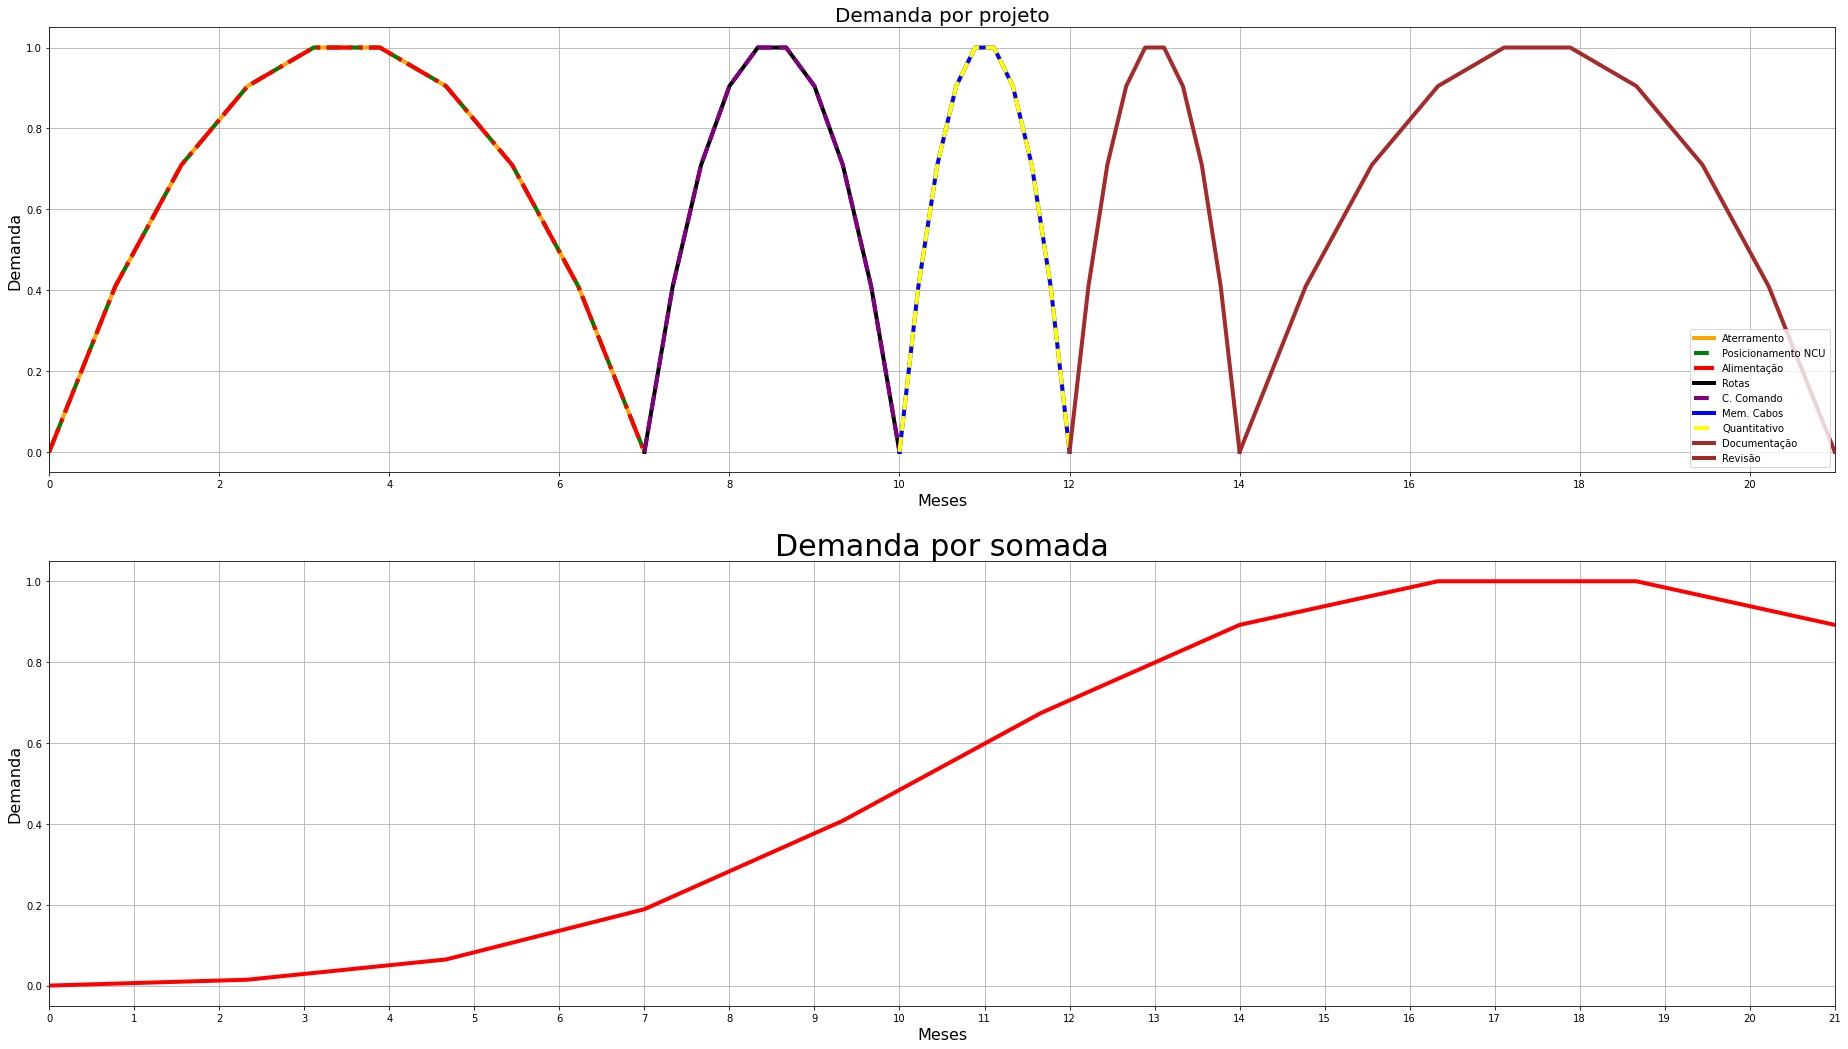

In [3]:
fig = plt.figure(figsize=[32,18])
ax = fig.subplots(2,1)

demanda_somada = np.zeros((10))
aux = np.linspace(0,21,num=10)

for projeto in projetos:
    obj = projetos[projeto]

    tempo = np.linspace(obj.inicio,obj.fim,10)
    tempo.sort()

    distribution_kernel = stats.gaussian_kde([obj.inicio,obj.fim])

    # Normalizing data

    norm_distribution = MinMaxScaler().fit_transform(distribution_kernel(tempo).reshape(-1, 1))
    norm_aux_distribution = MinMaxScaler().fit_transform(distribution_kernel(aux).reshape(-1, 1))

    # for i in range(len(norm_aux_distribution)):
    #     demanda_somada[i] = norm_aux_distribution[i]

    # Plot the Probability Distribuction Function (PDF)

    ax[0].set_ylabel('Demanda',fontsize=16)
    ax[0].set_xlabel("Meses",fontsize=16)
    ax[0].set_title('Demanda por projeto',fontsize=20)
        
    ax[0].plot(
        tempo, 
        norm_distribution,
        color=obj.color, 
        linestyle=obj.marker, 
        linewidth=4, 
        label=projeto)

ax[0].grid()
ax[0].legend()
ax[0].locator_params(axis='x', nbins=20)
ax[0].set_xlim(0,21)

# Plotando demanda somada

ax[1].set_ylabel('Demanda',fontsize=16)
ax[1].set_xlabel("Meses",fontsize=16)
ax[1].set_title('Demanda por somada',fontsize=30)
    
ax[1].plot(
    aux, 
    norm_aux_distribution,
    color="red", 
    linestyle="-", 
    linewidth=4, 
    )        

ax[1].grid()
ax[1].locator_params(axis='x', nbins=30)
ax[1].set_xlim(0,21)

plt.show()
fig.savefig('Analise_de_projetos.pdf', bbox_inches='tight')